# 🧩 1. Load Libraries

In [14]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 📂 2. Load the File

In [15]:
# Step 2: Load Excel file
# Replace file path if needed
file_path = "MBA667_Assignment 2_48dc457f-fa12-4f0e-965e-492bdad79cfa.xlsx"
df = pd.read_excel(file_path)

# View first few rows
df.head()


,Name,Material efficiency,Process efficiency,Energy efficiency,R&D,Demonstration projects,Renewable energy technologies,CCUS,Hydrogen based reduction,Fuel switching,Strategic partnership,Knowledge sharing,Green steel market development,Carbon tax,Carbon trading mechanism,Net-zero targets,TOTAL SCORE
0,Apple Co.,3,3,3,3,3,3,1,3,3,0,3,2,2,0,3,35
1,Apricot Co.,3,3,3,3,0,3,1,1,3,2,3,3,1,1,3,33
2,Avocado Co.,3,3,3,3,3,3,0,2,3,0,3,0,0,1,3,30
3,Banana Co.,3,3,3,3,3,3,3,3,3,0,3,1,0,2,3,36
4,Blackberry Co.,3,3,3,3,3,0,0,3,2,2,3,1,0,2,0,28


# 🧹 3. Preprocess the Data

In [16]:
# Step 3 (fixed): Preprocessing

# Drop identifier columns (e.g., firm names) and derived totals
cols_to_drop = ['Name', 'Firm Name', 'TOTAL SCORE', 'Total Score']
df_clean = df.drop(columns=cols_to_drop, errors='ignore')

# Convert everything else to numeric (non-numeric entries become NaN)
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')

# Check for NaNs
print("Missing values per column:\n", df_clean.isna().sum())

# Option 1: Fill missing values with column mean (recommended for scoring data)
df_clean = df_clean.fillna(df_clean.mean())

# Option 2 (alternate): Drop rows with missing data
# df_clean = df_clean.dropna()

# Standardize data for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

print("✅ Preprocessing complete. Shape:", X_scaled.shape)

Missing values per column:
 Material efficiency               0
Process efficiency                0
Energy efficiency                 0
R&D                               0
Demonstration projects            0
Renewable energy technologies     0
CCUS                              0
Hydrogen based reduction          0
Fuel switching                    0
Strategic partnership             0
Knowledge sharing                 0
Green steel market development    0
Carbon tax                        0
Carbon trading mechanism          0
Net-zero targets                  0
dtype: int64
✅ Preprocessing complete. Shape: (55, 15)


In [17]:
import numpy as np

has_nan = np.isnan(X_scaled).any()
print("Contains NaN:", has_nan)


Contains NaN: False


In [18]:
nan_positions = np.argwhere(np.isnan(X_scaled))

for row, col in nan_positions:
    print(f"NaN found at Row {row}, Column {col}")


# ⚙️ 4. Find Optimal Number of Clusters (Elbow + Silhouette)

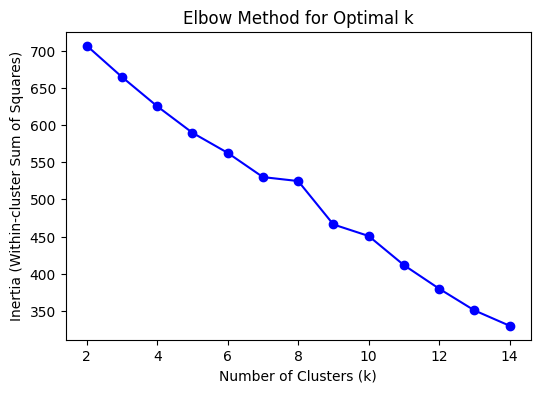

In [19]:
# Step 4: Elbow Method
inertia = []
K = range(2, 15)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


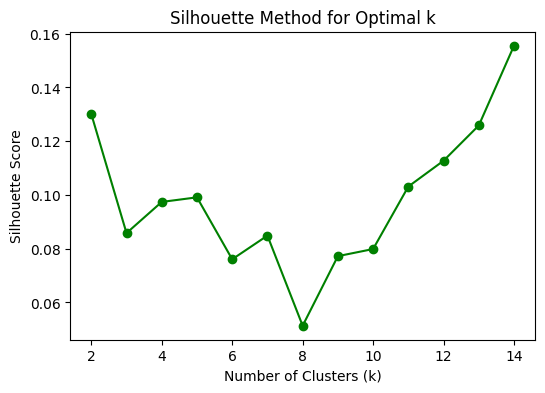

In [20]:
# Step 5: Silhouette Scores
sil_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(K, sil_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()


# 🎯 5. Final K-Means Model and Visualization

In [21]:
# Step 6: Fit final model with best k (choose based on elbow/silhouette)
best_k = 5  # change after observing plots
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels back to original dataframe
df['Cluster'] = labels
df.head()


,Name,Material efficiency,Process efficiency,Energy efficiency,R&D,Demonstration projects,Renewable energy technologies,CCUS,Hydrogen based reduction,Fuel switching,Strategic partnership,Knowledge sharing,Green steel market development,Carbon tax,Carbon trading mechanism,Net-zero targets,TOTAL SCORE,Cluster
0,Apple Co.,3,3,3,3,3,3,1,3,3,0,3,2,2,0,3,35,4
1,Apricot Co.,3,3,3,3,0,3,1,1,3,2,3,3,1,1,3,33,2
2,Avocado Co.,3,3,3,3,3,3,0,2,3,0,3,0,0,1,3,30,1
3,Banana Co.,3,3,3,3,3,3,3,3,3,0,3,1,0,2,3,36,4
4,Blackberry Co.,3,3,3,3,3,0,0,3,2,2,3,1,0,2,0,28,1


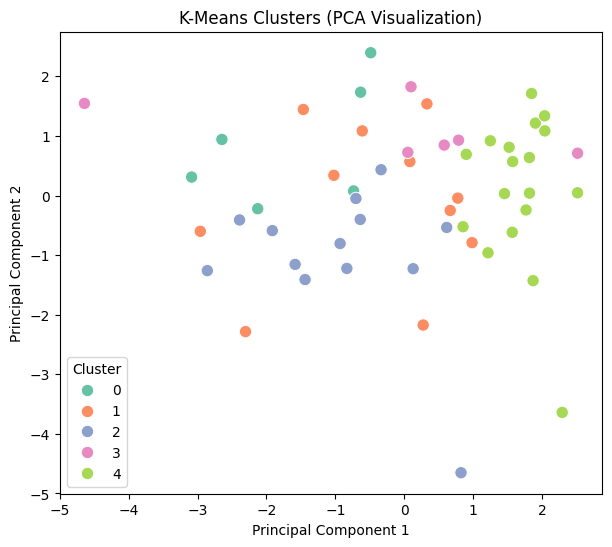

In [22]:
# Step 7: Visualize clusters using first two principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=labels, palette='Set2', s=80)
plt.title('K-Means Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


# 🧠 6. Cluster Inference

In [23]:
# Fix 2: Show company names by cluster (for interpretation)
df.groupby('Cluster')['Name'].apply(list)


# Summary with count
cluster_summary = df.select_dtypes(include=[np.number]).groupby('Cluster').mean()
cluster_summary['Count'] = df['Cluster'].value_counts().sort_index()
cluster_summary


,Material efficiency,Process efficiency,Energy efficiency,R&D,Demonstration projects,Renewable energy technologies,CCUS,Hydrogen based reduction,Fuel switching,Strategic partnership,Knowledge sharing,Green steel market development,Carbon tax,Carbon trading mechanism,Net-zero targets,TOTAL SCORE,Count
Cluster,,,,,,,,,,,,,,,,,
0,3.000000,3.000000,3.000000,3.000000,2.000000,2.571429,1.000000,1.571429,0.428571,1.142857,0.428571,0.571429,1.000000,1.714286,0.285714,24.714286,7
1,2.818182,2.727273,2.545455,3.000000,2.454545,2.090909,0.454545,1.636364,1.363636,1.727273,2.000000,0.727273,0.272727,1.181818,2.636364,27.636364,11
2,2.923077,2.769231,2.846154,2.923077,0.384615,2.615385,1.000000,0.769231,1.230769,2.923077,1.384615,1.846154,0.461538,1.307692,2.307692,27.692308,13
3,3.000000,2.000000,3.000000,1.166667,2.333333,2.333333,0.833333,2.166667,1.500000,2.166667,2.166667,1.500000,0.666667,1.666667,2.166667,28.666667,6
4,2.944444,2.833333,2.666667,3.000000,2.777778,2.888889,1.722222,2.055556,2.277778,2.222222,2.611111,1.888889,1.666667,1.833333,3.000000,36.388889,18


### 🎨 1️⃣ Plot: How each cluster performs in each metric

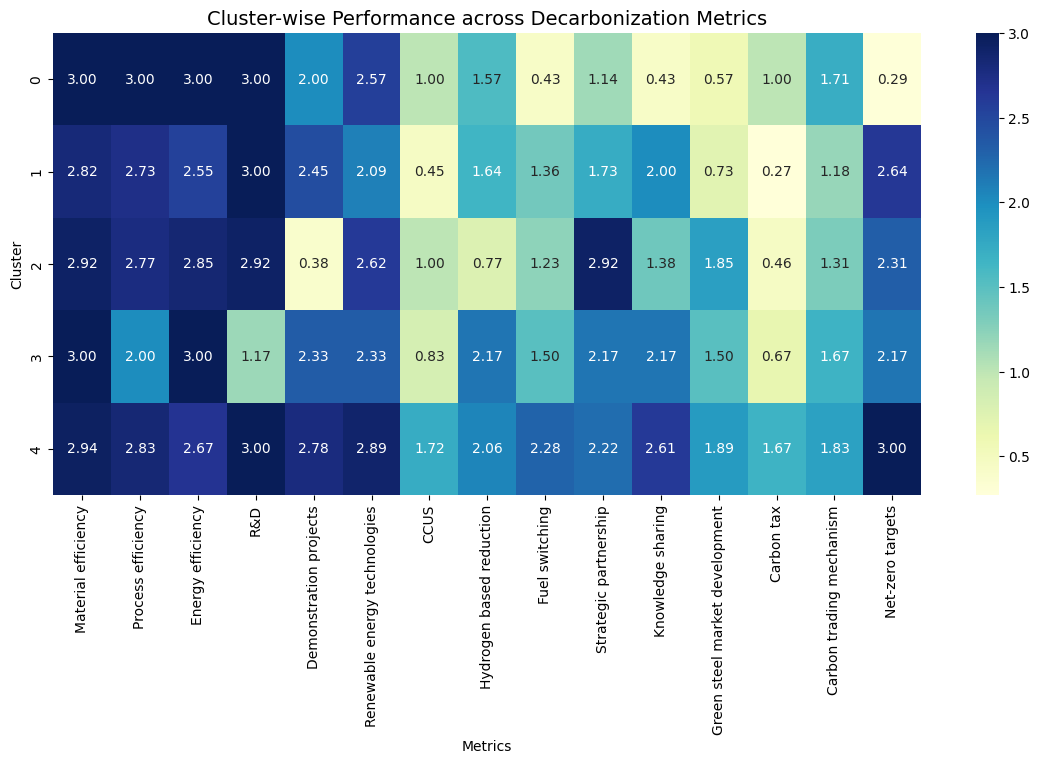

In [24]:
# Step 1: Visualize cluster performance across metrics

# Remove 'TOTAL SCORE' and 'Count' since they distort color scale
metrics = cluster_summary.drop(columns=['TOTAL SCORE', 'Count'])

plt.figure(figsize=(14,6))
sns.heatmap(metrics, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Cluster-wise Performance across Decarbonization Metrics", fontsize=14)
plt.xlabel("Metrics")
plt.ylabel("Cluster")
plt.show()


### 📊 2️⃣ Alternative: Radar (Spider) Chart (for presentation)

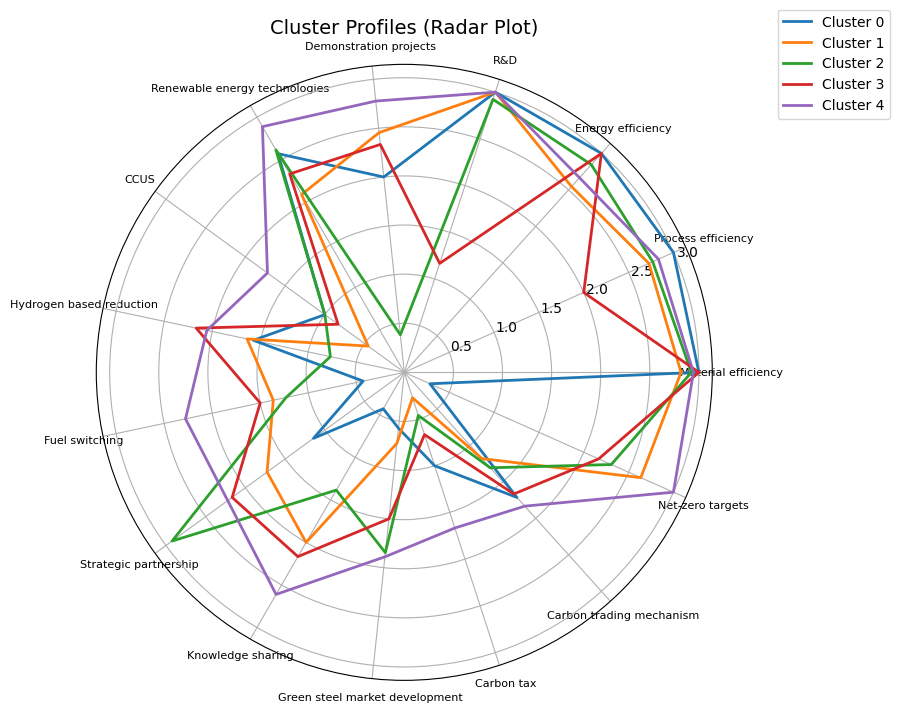

In [25]:
# Step 2: Radar chart for comparing clusters
import matplotlib.pyplot as plt
import numpy as np

# Choose the main features to compare
features = metrics.columns.tolist()
num_vars = len(features)

# Compute angle for each axis
angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Create radar plot
plt.figure(figsize=(8,8))
for cluster in metrics.index:
    values = metrics.loc[cluster].tolist()
    values += values[:1]  # close the loop
    plt.polar(angles, values, label=f'Cluster {cluster}', linewidth=2)
plt.xticks(angles[:-1], features, fontsize=8)
plt.title("Cluster Profiles (Radar Plot)", fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


### 📊 Bar Plot: Average Total Score per Cluster

/var/folders/l3/651ygkxd24l43cqbl380p_t80000gn/T/ipykernel_1166/801340612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


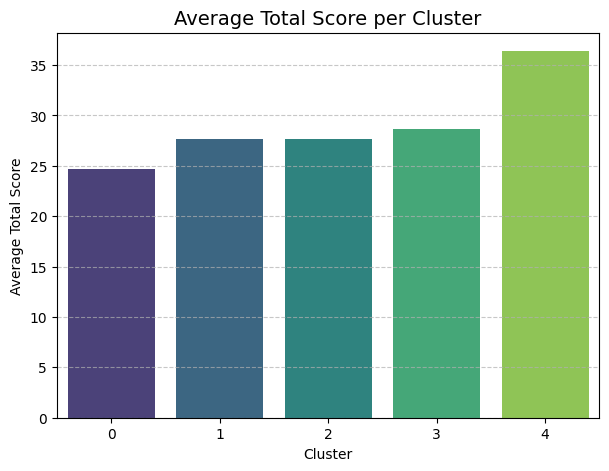

In [26]:
# Step: Compare clusters by Total Score
plt.figure(figsize=(7,5))
sns.barplot(
    x=cluster_summary.index,
    y=cluster_summary["TOTAL SCORE"],
    palette="viridis"
)
plt.title("Average Total Score per Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Average Total Score")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
